In [4]:
#pip install yfinance
import yfinance as yf

In [7]:
# Now  see yahoo finance ticker for your stock symbol
stock_symbol = 'ONGC.NS'

In [8]:
# last 10 year data with interval of 1 day 
data= yf.download(tickers = stock_symbol,period="10y",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-08-21,187.399994,192.066666,187.399994,191.366669,124.629387,1744494
2012-08-22,190.166672,192.833328,189.733337,190.800003,124.260307,2342109
2012-08-23,190.000000,191.266663,186.966660,187.800003,122.306534,2383513
2012-08-24,188.666672,192.466660,187.466660,191.233337,124.542526,3207067
2012-08-27,190.733337,193.133331,190.066666,191.633331,124.803024,1903851


In [12]:
len(data)

2464

In [13]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-12,133.899994,139.699997,133.500000,139.199997,135.960464,40876891
2022-08-16,139.500000,141.899994,136.100006,139.949997,136.693024,31230003
2022-08-17,139.949997,140.800003,138.699997,139.649994,136.399994,15694770
2022-08-18,138.250000,138.300003,134.699997,135.550003,135.550003,42597708
2022-08-19,137.500000,138.500000,134.050003,134.600006,134.600006,35382493


In [16]:
opn= data[['Open']]

<AxesSubplot:xlabel='Date'>

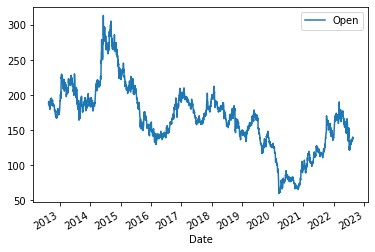

In [17]:
opn.plot()

In [18]:
import matplotlib.pyplot as plt

In [19]:
ds = opn.values

In [20]:
ds

array([[187.3999939 ],
       [190.16667175],
       [190.        ],
       ...,
       [139.94999695],
       [138.25      ],
       [137.5       ]])

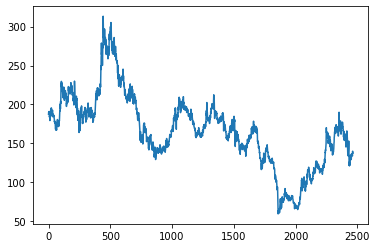

In [21]:
plt.plot(ds)

In [22]:
import numpy as np 

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
# using MinMaxScaler for normalizing data between 0 and  1

normalizer = MinMaxScaler(feature_range=(0,1))

ds_scaled= normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [26]:
len(ds_scaled),len(ds)

(2464, 2464)

In [29]:
# defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled)- train_size

In [30]:
train_size, test_size

(1724, 740)

In [32]:
# spitting data between train and test 

ds_train, ds_test= ds_scaled[0:train_size,:],ds_scaled[train_size:len(ds_scaled),:1]

In [34]:
len(ds_train),len(ds_test)

(1724, 740)

In [36]:
# creating dataset in time series for LSTM Model

def create_ds(dataset,step):
    Xtrain,Ytrain =[],[]
    for i in range(len(dataset)-step-1):
        a=dataset[i:(i+step),0]
        Xtrain.append(a)
        Ytrain.append(dataset[i+step,0])
    return np.array(Xtrain),np.array(Ytrain)

In [43]:
# taking 100 days price as on record for training 

time_stamp = 100 
X_train,Y_train = create_ds(ds_train,time_stamp)
X_test,Y_test = create_ds(ds_test,time_stamp)


In [44]:
 X_train.shape,Y_train.shape

((1623, 100), (1623,))

In [45]:
X_test.shape,Y_test.shape

((639, 100), (639,))

In [46]:
# Reshaping dta to fit into LSTM model


X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)


X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [53]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=2f6b542299adccf2a65cba9dd97305f2ddf96dcbe24b6b0aeb784c360a123103
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [54]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [55]:
from keras.models import Sequential

from keras.layers import Dense, LSTM

In [57]:
# creating LSTM model using keras 
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Training model with adm optimizer and mean squared error loss function 

model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64)

Epoch 1/100
26/26 [==============================] - 29s 466ms/step - loss: 0.0403 - val_loss: 0.0175
Epoch 2/100
26/26 [==============================] - 8s 307ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 3/100
26/26 [==============================] - 7s 261ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 4/100
26/26 [==============================] - 8s 305ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
26/26 [==============================] - 7s 272ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 6/100
26/26 [==============================] - 8s 296ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 7/100
26/26 [==============================] - 8s 295ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/100
26/26 [==============================] - 7s 286ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 9/100
26/26 [==============================] - 8s 294ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 10/100
26/26 [==============================] - 7s 286ms/step - loss: 0.0012 - val_l

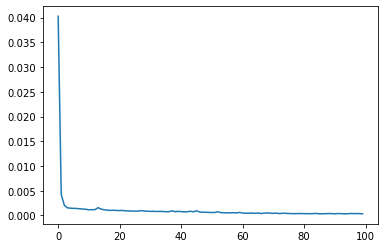

In [60]:
#plotting loss ,it shows that loss has decreased significiantly and model trained well

loss = model.history.history['loss']
plt.plot(loss)

In [64]:
# predicting on train and test data 

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 1s 53ms/step


In [66]:
# Inverse transform to get actual data 

train_predict= normalizer.inverse_transform(train_predict)
test_predict= normalizer.inverse_transform(test_predict) 
    

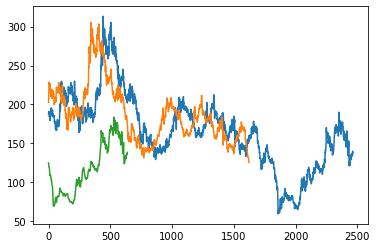

In [67]:
#Comparing using variables

plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [68]:
type(train_predict)

numpy.ndarray

In [69]:
test = np.vstack((train_predict,test_predict))

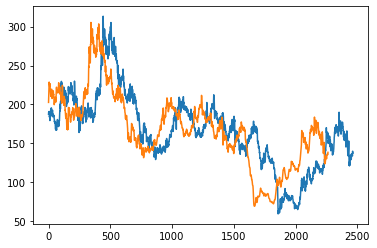

In [70]:
# Combining the predicted data to create uniform data visulization 

plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [114]:
len(ds_test)

740

In [115]:
#Getting the last 100 days record 
fut_inp = ds_test[640:]

In [116]:
fut_inp =fut_inp.reshape(1,-1)


In [117]:
tmp_inp = list(fut_inp)

In [118]:
fut_inp.shape

(1, 100)

In [119]:
# creating list of the last 100 data 

tmp_inp= tmp_inp[0].tolist()

In [121]:
# predicting next 30 days price suing the current data
# it will predict in sliding window manner (algorithm ) with stride 1

lst_output =[]
n_steps=100
i=0
while(i<30):
    if(len(tmp_inp)>100):
        fut_inp= np.array(tmp_inp[1:])
        fut_inp = fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1,n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape(1, n_steps, 1)
        yhat=model.predict(fut_inp,verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)
        
        
        

[[0.3139895498752594], [0.31480085849761963], [0.3157399892807007], [0.3167111575603485], [0.3177025020122528], [0.31871435046195984], [0.31974416971206665], [0.3207864761352539], [0.3218342363834381], [0.3228801488876343], [0.3239179849624634], [0.32494276762008667], [0.32595139741897583], [0.3269425332546234], [0.32791608572006226], [0.3288731276988983], [0.32981568574905396], [0.3307460844516754], [0.33166664838790894], [0.3325796127319336], [0.33348679542541504], [0.33438968658447266], [0.3352891504764557], [0.3361857533454895], [0.33707964420318604], [0.33797067403793335], [0.3388587236404419], [0.3397432565689087], [0.340624064207077], [0.3415009081363678]]


In [122]:
len(ds_scaled)

2464

In [124]:
# creating a dummy plane to plot graph one after another

plot_new = np.arange(1,101)
plot_pred = np.arange(101,131)


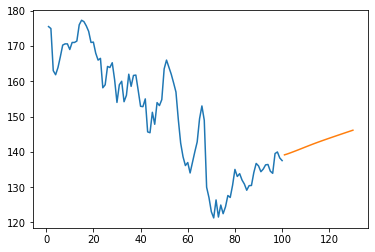

In [125]:
plt.plot(plot_new,normalizer.inverse_transform(ds_scaled[2364:]))
plt.plot(plot_pred,normalizer.inverse_transform(lst_output))

In [128]:
ds_new= ds_scaled.tolist()


len(ds_new)

2464

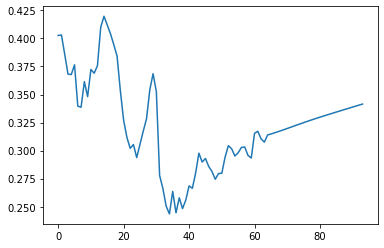

In [129]:
# extend helps us to fill the missing values with approx value 

ds_new.extend(lst_output)
plt.plot(ds_new[2400:])

In [130]:
# creating final data for plottimg 
final_graph = normalizer.inverse_transform(ds_new).tolist()

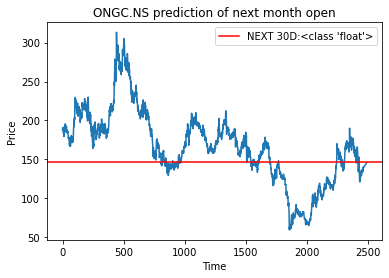

In [133]:
# ploting  final results with predicted value after 30 days 

plt.plot(final_graph,)
plt.ylabel('Price')
plt.xlabel('Time')
plt.title('{0} prediction of next month open'.format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1],color ='red',label='NEXT 30D:{0}'.format(float))
plt.legend()